In [406]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [407]:
df = pd.read_csv('./CreditScoring.csv')
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [408]:
df.shape[0]

4455

In [409]:
df.dtypes

Status       int64
Seniority    int64
Home         int64
Time         int64
Age          int64
Marital      int64
Records      int64
Job          int64
Expenses     int64
Income       int64
Assets       int64
Debt         int64
Amount       int64
Price        int64
dtype: object

In [410]:
df.columns = df.columns.str.lower()
df.columns

Index(['status', 'seniority', 'home', 'time', 'age', 'marital', 'records',
       'job', 'expenses', 'income', 'assets', 'debt', 'amount', 'price'],
      dtype='object')

In [411]:
# df['status'].values[1]

In [412]:
df[df['status'] == 0].index.values

array([3309], dtype=int64)

In [413]:
df.isnull().sum()

status       0
seniority    0
home         0
time         0
age          0
marital      0
records      0
job          0
expenses     0
income       0
assets       0
debt         0
amount       0
price        0
dtype: int64

In [414]:
df.nunique()

status          3
seniority      47
home            7
time           11
age            50
marital         6
records         2
job             5
expenses       94
income        353
assets        160
debt          183
amount        285
price        1419
dtype: int64

In [415]:
df.status.value_counts()

1    3200
2    1254
0       1
Name: status, dtype: int64

In [416]:
df.status.loc[4]

1

In [417]:
# defining a dictionary to map the values of `1` as `ok` `2` as `default` `3` as `unk` means unknown
status_value = {
    0: 'unk',
    1: 'ok',
    2: 'default'
}

In [418]:
# mapping it to `df.status`
df.status = df.status.map(status_value)
df.head()
df['status'][10]

'ok'

In [419]:
k = 0
for i in range(len(df)):
    if df['status'][i] == 'unk':
        k += 1
    
print(k)

1


In [420]:
home_values = { 
 1: 'rent', 
 2: 'owner', 
 3: 'private', 
 4: 'ignore', 
 5: 'parents', 
 6: 'other', 
 0: 'unk' 
} 

df.home = df.home.map(home_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,rent,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,owner,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,rent,36,26,1,1,1,46,107,0,0,310,910


In [421]:

marital_values = { 
 1: 'single', 
 2: 'married', 
 3: 'widow', 
 4: 'separated', 
 5: 'divorced', 
 0: 'unk' 
} 
df.marital = df.marital.map(marital_values) 

records_values = { 
 1: 'no', 
 2: 'yes', 
 0: 'unk' 
} 
df.records = df.records.map(records_values) 

job_values = { 
 1: 'fixed', 
 2: 'partime', 
 3: 'freelance', 
 4: 'others', 
 0: 'unk' 
} 
df.job = df.job.map(job_values) 

In [422]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [423]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [424]:
# as the value of 99999999.0 is suspicious. It replaces the null value with this digit. thus replacing its values back to NaN.

for c in ['income','assets','debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [425]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [426]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [427]:
# `uk` is in one row, where we dont know if the user paid or not thus not useful to us. Therefore dropping
df = df[df['status'] != 'unk']
df.status.value_counts()

ok         3200
default    1254
Name: status, dtype: int64

Splitting data into training, validation and test dataset

In [428]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df,test_size=0.2,random_state=11)

In [429]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25,random_state=11)

In [430]:
df_train = df_train.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)

In [431]:
df_train.shape[0], df_val.shape[0], df_test.shape[0]

(2672, 891, 891)

In [432]:
y_train = (df_train.status == 'default').values
y_val = (df_val.status == 'default').values

In [433]:
del df_train['status']
del df_val['status']

In [434]:
df_train.isnull().sum()

seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       25
assets       30
debt         11
amount        0
price         0
dtype: int64

As we before replaced white spaces in `income`, `assets`, `debt` with `NaN` we got some null values

In [435]:
df_train = df_train.fillna(0)
df_val = df_val.fillna(0)

In [436]:
df_train.isnull().sum()

seniority    0
home         0
time         0
age          0
marital      0
records      0
job          0
expenses     0
income       0
assets       0
debt         0
amount       0
price        0
dtype: int64

For one hot encoding we need dictionary, thus converting into dictionary using `DictVectorizer`

In [437]:
dict_train = df_train.to_dict(orient='records')
dict_val = df_val.to_dict(orient='records')

In [438]:
dict_train[0]

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [439]:
# Applying DictVectorizer
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

In [440]:
dv.get_feature_names()

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'job=unk',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

In [441]:
X_train.shape[1]

29

Decision trees are if-else-condition which gives us the result at the end. They can be created using simple python with if-else statements by observing the complete dataset

In [442]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [443]:
# as this is binary classification problem we will be using AUC score to check the accuracy
from sklearn.metrics import roc_auc_score
y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred)

1.0

In [444]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred).round(3)

0.644

We can see that the model is overfitted, it memorized the training datatset so well that didnt worked effectively on the unseen data.

Overfitting happens when we have a complex model with enough power to remember all 
the training data. If we force the model to be simpler, we can `make it less powerful`, and 
improve the model’s ability to generalize.

In [445]:
# Trying using the `max_depth` feature

dt = DecisionTreeClassifier(max_depth=2) # default -> max_depth = none which means tree can get as long as it can
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [446]:
from sklearn.tree import export_text 
tree_text = export_text(dt, feature_names=dv.feature_names_) 
print(tree_text)

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- class: False
|   |--- job=partime >  0.50
|   |   |--- class: True
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: True
|   |--- seniority >  6.50
|   |   |--- class: False



In [447]:
y_pred = dt.predict_proba(X_train)[:,1]
acc1 = roc_auc_score(y_train, y_pred).round(3)

y_pred = dt.predict_proba(X_val)[:,1]
acc2 = roc_auc_score(y_val,y_pred).round(3)

acc1,acc2

(0.705, 0.669)

In [448]:
for i in [1,2,3,4,5,6,7,8,10,15]:
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:,1]
    acc = roc_auc_score(y_val, y_pred).round(3)
    print(f"max_depth: {i} -> {acc}" )  # best acc at i = 4,5,6

max_depth: 1 -> 0.606
max_depth: 2 -> 0.669
max_depth: 3 -> 0.739
max_depth: 4 -> 0.761
max_depth: 5 -> 0.766
max_depth: 6 -> 0.752
max_depth: 7 -> 0.737
max_depth: 8 -> 0.737
max_depth: 10 -> 0.7
max_depth: 15 -> 0.674


Checked for `max_depth` feature, now tuning for `min_samples_leaf`

In [449]:
for m in [4,5,6]:
    print(f"depth: {m}")
    for s in [1,2,3,5,10,15,20]:
        dt = DecisionTreeClassifier(max_depth=m, min_samples_leaf=s)
        dt.fit(X_train,y_train)
        y_pred = dt.predict_proba(X_val)[:,1]
        acc = roc_auc_score(y_val, y_pred).round(3)
        print(f"sample leaf nodes: {s} -> acc: {acc}")
    print()

depth: 4
sample leaf nodes: 1 -> acc: 0.761
sample leaf nodes: 2 -> acc: 0.761
sample leaf nodes: 3 -> acc: 0.761
sample leaf nodes: 5 -> acc: 0.761
sample leaf nodes: 10 -> acc: 0.761
sample leaf nodes: 15 -> acc: 0.764
sample leaf nodes: 20 -> acc: 0.761

depth: 5
sample leaf nodes: 1 -> acc: 0.766
sample leaf nodes: 2 -> acc: 0.767
sample leaf nodes: 3 -> acc: 0.766
sample leaf nodes: 5 -> acc: 0.768
sample leaf nodes: 10 -> acc: 0.762
sample leaf nodes: 15 -> acc: 0.773
sample leaf nodes: 20 -> acc: 0.774

depth: 6
sample leaf nodes: 1 -> acc: 0.744
sample leaf nodes: 2 -> acc: 0.756
sample leaf nodes: 3 -> acc: 0.752
sample leaf nodes: 5 -> acc: 0.759
sample leaf nodes: 10 -> acc: 0.778
sample leaf nodes: 15 -> acc: 0.785
sample leaf nodes: 20 -> acc: 0.774



Training on -> `max_depth: 6`, `min_samle_leaf: 15`

In [450]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_val)[:,1]
acc = roc_auc_score(y_val,y_pred).round(3)
acc

0.785

The score is ok, to improve this we can check for random forest classifiers. This first divides dataset into subsets and train n different models on different parameters, while predicting the output, we combine (`ensemble`) all the different trees into 1. (n_estimators == no. of different trees created  (in sklearn))

In [451]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=11)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:,1]
acc = roc_auc_score(y_val, y_pred).round(3)
acc

0.775

In [452]:
# checking for different `n_estimators` value
scores = []
for n in range (10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=11)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:,1]
    acc = roc_auc_score(y_val, y_pred).round(3)
    scores.append(acc)
    print(f"n_trees: {n} -> score: {acc}")

n_trees: 10 -> score: 0.775
n_trees: 20 -> score: 0.8
n_trees: 30 -> score: 0.806
n_trees: 40 -> score: 0.809
n_trees: 50 -> score: 0.814
n_trees: 60 -> score: 0.816
n_trees: 70 -> score: 0.816
n_trees: 80 -> score: 0.818
n_trees: 90 -> score: 0.818
n_trees: 100 -> score: 0.819
n_trees: 110 -> score: 0.818
n_trees: 120 -> score: 0.818
n_trees: 130 -> score: 0.819
n_trees: 140 -> score: 0.82
n_trees: 150 -> score: 0.821
n_trees: 160 -> score: 0.821
n_trees: 170 -> score: 0.822
n_trees: 180 -> score: 0.823
n_trees: 190 -> score: 0.822
n_trees: 200 -> score: 0.822


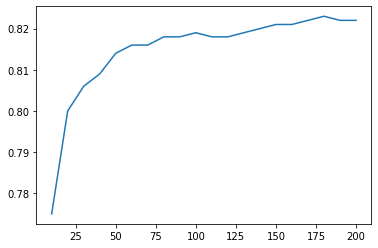

In [453]:
plt.plot(range(10,201,10),scores)  # rapid growth in starting of the trees, not growing after around 175 trees
# accuracy score remains stable near 82%

This was only the no. of trees to improve `decision tree`. There are other features too, to improve the efficiency of model

In [454]:
# Parameter tuning for the random forest on `max_depth`
all_aucs = {}
for depth in [5,10,15,20]:
    print(f"depth: {depth} ")
    aucs = []

    for n in range (10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,max_depth=depth ,random_state=11)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        acc = roc_auc_score(y_val, y_pred).round(3)
        print(f"n_trees: {n} -> score: {acc}")
        aucs.append(acc)

    all_aucs[depth] = aucs
    print()

depth: 5 
n_trees: 10 -> score: 0.796
n_trees: 20 -> score: 0.806
n_trees: 30 -> score: 0.807
n_trees: 40 -> score: 0.808
n_trees: 50 -> score: 0.807
n_trees: 60 -> score: 0.807
n_trees: 70 -> score: 0.806
n_trees: 80 -> score: 0.809
n_trees: 90 -> score: 0.808
n_trees: 100 -> score: 0.808
n_trees: 110 -> score: 0.809
n_trees: 120 -> score: 0.809
n_trees: 130 -> score: 0.809
n_trees: 140 -> score: 0.809
n_trees: 150 -> score: 0.81
n_trees: 160 -> score: 0.809
n_trees: 170 -> score: 0.81
n_trees: 180 -> score: 0.809
n_trees: 190 -> score: 0.809
n_trees: 200 -> score: 0.808

depth: 10 
n_trees: 10 -> score: 0.802
n_trees: 20 -> score: 0.814
n_trees: 30 -> score: 0.822
n_trees: 40 -> score: 0.823
n_trees: 50 -> score: 0.825
n_trees: 60 -> score: 0.824
n_trees: 70 -> score: 0.824
n_trees: 80 -> score: 0.824
n_trees: 90 -> score: 0.825
n_trees: 100 -> score: 0.825
n_trees: 110 -> score: 0.825
n_trees: 120 -> score: 0.825
n_trees: 130 -> score: 0.824
n_trees: 140 -> score: 0.825
n_trees: 150

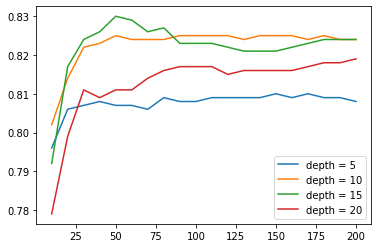

In [455]:
# plotting graph
num_trees = list(range(10,201,10))
plt.plot(num_trees, all_aucs[5], label='depth = 5')
plt.plot(num_trees, all_aucs[10], label='depth = 10')
plt.plot(num_trees, all_aucs[15], label='depth = 15')
plt.plot(num_trees, all_aucs[20], label='depth = 20')
plt.legend()

In [456]:
# Parameter tuning for the random forest on `min_sample_leaf`
all_aucs = {}
for leaf in [3,5,10,15]:
    print(f"no. of leaf: {leaf}")
    aucs = []
    for n in range (10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,min_samples_leaf=leaf ,random_state=11, max_depth=10) # max_depth = 10 because better accuracy
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        acc = roc_auc_score(y_val, y_pred).round(3)
        print(f"n_trees: {n} -> score: {acc}")
        aucs.append(acc)

    all_aucs[leaf] = aucs
    print()

no. of leaf: 3
n_trees: 10 -> score: 0.8
n_trees: 20 -> score: 0.814
n_trees: 30 -> score: 0.82
n_trees: 40 -> score: 0.82
n_trees: 50 -> score: 0.822
n_trees: 60 -> score: 0.824
n_trees: 70 -> score: 0.824
n_trees: 80 -> score: 0.823
n_trees: 90 -> score: 0.823
n_trees: 100 -> score: 0.822
n_trees: 110 -> score: 0.822
n_trees: 120 -> score: 0.822
n_trees: 130 -> score: 0.822
n_trees: 140 -> score: 0.822
n_trees: 150 -> score: 0.822
n_trees: 160 -> score: 0.821
n_trees: 170 -> score: 0.822
n_trees: 180 -> score: 0.823
n_trees: 190 -> score: 0.823
n_trees: 200 -> score: 0.823

no. of leaf: 5
n_trees: 10 -> score: 0.814
n_trees: 20 -> score: 0.82
n_trees: 30 -> score: 0.826
n_trees: 40 -> score: 0.826
n_trees: 50 -> score: 0.827
n_trees: 60 -> score: 0.826
n_trees: 70 -> score: 0.826
n_trees: 80 -> score: 0.826
n_trees: 90 -> score: 0.825
n_trees: 100 -> score: 0.825
n_trees: 110 -> score: 0.824
n_trees: 120 -> score: 0.823
n_trees: 130 -> score: 0.824
n_trees: 140 -> score: 0.824
n_tree

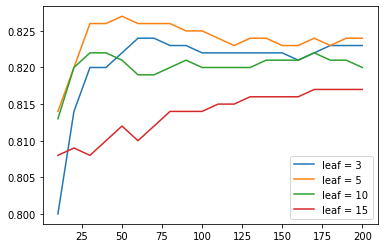

In [457]:
num_trees = list(range(10,201,10))
plt.plot(num_trees, all_aucs[3], label = 'leaf = 3')
plt.plot(num_trees, all_aucs[5], label = 'leaf = 5')
plt.plot(num_trees, all_aucs[10], label = 'leaf = 10')
plt.plot(num_trees, all_aucs[15], label = 'leaf = 15')
plt.legend()

Better results at `leaf = 5`

In [458]:
# Training on `n_estimators = 200` `max_depth = 10` and `min_sample_leaf = 5`
rf = RandomForestClassifier(n_estimators=180, max_depth=10, min_samples_leaf=5, random_state=11)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:,1]
acc = roc_auc_score(y_val, y_pred).round(3)
acc

0.823

Before we can train an XGBoost model, we need to wrap our data into DMatrix — a special 
data structure for finding splits efficiently. 

In [459]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names = dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names = dv.feature_names_)

In [460]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',  # most imp parameter
    'nthread': 8,
    'seed': 1,
    'silent': 1
}

In [461]:
# training xgboost
model = xgb.train(xgb_params, dtrain, num_boost_round=10) # starting with ten trees

In [462]:
y_pred = model.predict(dval)
y_pred[:10]

array([0.08926772, 0.0468099 , 0.09692743, 0.17261842, 0.05435968,
       0.12576081, 0.08033007, 0.61870354, 0.486538  , 0.04056795],
      dtype=float32)

In [463]:
# calculating `roc_auc_score`
roc_auc_score(y_val,y_pred).round(3)

0.815

To monitor value of auc score, xgboost has `watchlist` 

In [464]:
watchlist = [(dtrain, 'train'),(dval, 'val')]
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'silent': 1
}

In [465]:
model = xgb.train(xgb_params, dtrain, num_boost_round=101, evals=watchlist,verbose_eval=10)

[0]	train-auc:0.86300	val-auc:0.76818
[10]	train-auc:0.95002	val-auc:0.81558
[20]	train-auc:0.97316	val-auc:0.81775
[30]	train-auc:0.98772	val-auc:0.81787
[40]	train-auc:0.99456	val-auc:0.81387
[50]	train-auc:0.99688	val-auc:0.81128
[60]	train-auc:0.99889	val-auc:0.80801
[70]	train-auc:0.99944	val-auc:0.80732
[80]	train-auc:0.99985	val-auc:0.80677
[90]	train-auc:0.99992	val-auc:0.80637
[100]	train-auc:0.99998	val-auc:0.80508


In [466]:
model = xgb.train(xgb_params, dtrain, num_boost_round=30)
y_pred = model.predict(dval)

In [467]:
acc_eta_3 = roc_auc_score(y_val, y_pred)

In [468]:
# training for eta = 0.1
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'silent': 1
}

In [469]:
model = xgb.train(xgb_params, dtrain, num_boost_round=200, evals=watchlist,verbose_eval=10)

[0]	train-auc:0.86300	val-auc:0.76818
[10]	train-auc:0.91558	val-auc:0.80009
[20]	train-auc:0.93933	val-auc:0.80920
[30]	train-auc:0.95411	val-auc:0.81557
[40]	train-auc:0.96332	val-auc:0.81843
[50]	train-auc:0.97014	val-auc:0.82348
[60]	train-auc:0.97641	val-auc:0.82446
[70]	train-auc:0.98124	val-auc:0.82477
[80]	train-auc:0.98567	val-auc:0.82329
[90]	train-auc:0.98818	val-auc:0.82363
[100]	train-auc:0.99056	val-auc:0.82371
[110]	train-auc:0.99305	val-auc:0.82355
[120]	train-auc:0.99434	val-auc:0.82208
[130]	train-auc:0.99510	val-auc:0.82079
[140]	train-auc:0.99606	val-auc:0.82025
[150]	train-auc:0.99690	val-auc:0.81946
[160]	train-auc:0.99741	val-auc:0.81907
[170]	train-auc:0.99794	val-auc:0.81839
[180]	train-auc:0.99832	val-auc:0.81830
[190]	train-auc:0.99874	val-auc:0.81711
[199]	train-auc:0.99915	val-auc:0.81751


In [470]:
model = xgb.train(xgb_params, dtrain, num_boost_round=70)
y_pred = model.predict(dval)

In [471]:
acc_eta_1 = roc_auc_score(y_val, y_pred)

In [472]:
acc_eta_1, acc_eta_3

(0.8246318810394516, 0.8190192778087234)

We can see that as `eta` decreases the best score comes at higher number if trees -> smaller the learning rate, higher the number of iterations.

In [473]:
# training for `max_depth`
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'silent': 1
}

In [474]:
model = xgb.train(xgb_params, dtrain, num_boost_round=180)
y_pred = model.predict(dval)

In [475]:
roc_auc_score(y_val,y_pred).round(3)

0.836

Now training the final model on `df_full_train`

In [476]:
y_full_train = (df_full_train.status == 'default').values
y_test = (df_test.status == 'default').values

In [477]:
del df_full_train['status']
del df_test['status']

In [478]:
dict_full_train = df_full_train.fillna(0).to_dict(orient='records')
dict_test = df_test.fillna(0).to_dict(orient='records')

In [481]:
X_full_train = dv.fit_transform(dict_full_train)
X_test = dv.transform(dict_test)

In [483]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,feature_names=dv.feature_names_)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=dv.feature_names_)

In [501]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'silent': 1,
    'colsample_bytree': 0.8
}

In [502]:
model = xgb.train(xgb_params, dfulltrain, num_boost_round=160)
y_pred = model.predict(dtest)

In [504]:
roc_auc_score(y_test, y_pred).round(3)

0.838